In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [7]:
import seaborn as sns
iris = sns.load_dataset('iris')

#Making the feature matrix
X_iris = iris.drop('species', axis=1)
#The target feature that will be predicted from some feature in X.
y_iris = iris['species']

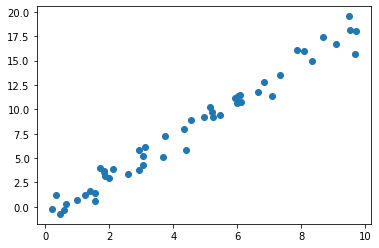

In [9]:
#Let's make some predictable random stuff.
#y is made from X, so there is gonna be a relationship
#X is the feature matrix, y is the target feature.
rng = np.random.RandomState(42)
X = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y);

In [3]:
#Gonna need the LinearRegression class stashed in sklearn.linear_model
from sklearn.linear_model import LinearRegression

In [4]:
#This is an instatiation of the LinearRegression class. Not yet fit to anything.
#Only hyperparameter is fit_intercept
model = LinearRegression(fit_intercept=True)

In [5]:
type(model)

sklearn.linear_model.base.LinearRegression

In [6]:
#Those things in the (parameters) are the hyper parameters. We only chose one. 
#The rest are default.
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

<h1>Keep in mind that when the model is instantiated, the only action is the storing of these hyperparameter values.

In [10]:
#X needs to be a multidimensional array even though it is actually a 1D array(Panda Series)
X.shape

(50,)

<h1>The newaxis is used to increase the dimension of the existing array by one more dimension, when used once.<h1>

1D array will become 2D array

2D array will become 3D array

3D array will become 4D array

4D array will become 5D array

In [14]:
X = x[:, np.newaxis]
#X is now array[ [],
                 [],
                 [],
                 [] ]

<h1>Apply our model to the data. Use the fit method of the LinearRegression object we summoned into our world
    on to the random data we improvised.

In [18]:
#model is the instatiation of the LinearRegression class we made a few cells back. 
#It's gonna get changed without having to re-assign it. Mutilated.
model.fit(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

<h1> This fit() makes a lot of math happen. All model parameters that were learned during the fit() process are now accessible with object notation. With the trailing undersocre. No se porque.

In [20]:
#Slope of the model we made.
model.coef_

array([1.9776566])

In [21]:
#Y-intercept of the model nos creamos.
model.intercept_

-0.9033107255311164

<h1>We're gonna need some test data to see how well the model we made works.

In [26]:
#A nice numpy array that is 50 points between -1 and 11
Xfit = np.linspace(-1, 11)

In [31]:
#COERCE them into a [n_samples, n_features] shape by adding an empty axis.
Xfit = xfit[:, np.newaxis]
Xfit.shape

(50, 1)

In [34]:
#.predict is a method that creates an array of target variable values that were predicted for 
#the inputed data (Xfit data).
yfit = model.predict(Xfit)
type(yfit)

numpy.ndarray

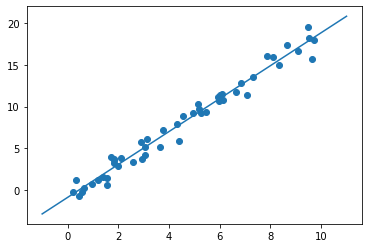

In [33]:
#the scatter is the XandY of the 'training data' we used to train the Model.
#the plot is the xfit values (test_data) paired with the .predicted values made from pushing them through the Model.
plt.scatter(x, y)
plt.plot(xfit, yfit);

In [3]:
from sklearn.model_selection import train_test_split

In [8]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris,
                                                random_state=1)

In [9]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB()                       # 2. instantiate model
model.fit(Xtrain, ytrain)                  # 3. fit model to data
y_model = model.predict(Xtest)  

In [10]:
from sklearn.metrics import accuracy_score


In [17]:
accuracy_score(ytest, y_model)

0.9736842105263158

In [18]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

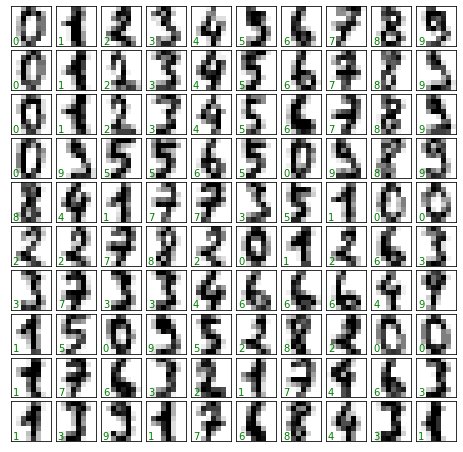

In [21]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

In [24]:
digits.data.shape

(1797, 64)

In [25]:
X = digits.data

In [26]:
y = digits.target

In [27]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

In [28]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
            edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('spectral', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

ValueError: Colormap spectral is not recognized. Possible values are: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r